In [ ]:
import numpy as np
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
%matplotlib inline

import torch, torchvision
from torchvision import datasets, transforms

from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

In [ ]:
torch.manual_seed(69)

In [ ]:
train_data = datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
train_data, valid_data = train_test_split(train_data, test_size=0.1)
test_data = datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())

100%|██████████| 170498071/170498071 [00:04<00:00, 34172778.08it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=8, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=8, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=8, shuffle=True)

In [ ]:
train_dataiter = iter(train_loader)
test_dataiter = iter(test_loader)


In [ ]:
imgs, labels = next(train_dataiter)

In [ ]:
label_to_name = {
    0: "Самолет",
    1: "Авто",
    2: "Птица",
    3: "Кот",
    4: "Олень",
    5: "Собака",
    6: "Лягушка",
    7: "Лошадь",
    8: "Корабль",
    9: "Грузовик"
}

In [ ]:
def show(imgs, labels):
  f, axes = plt.subplots(1, 8, figsize=(30, 30))
  for i, axis in enumerate(axes):
    axes[i].imshow(np.squeeze(np.transpose(imgs[i].numpy(), (1, 2, 0))), cmap='gray')
    axes[i].set_title(label_to_name[int(labels[i].numpy())])
  plt.show()


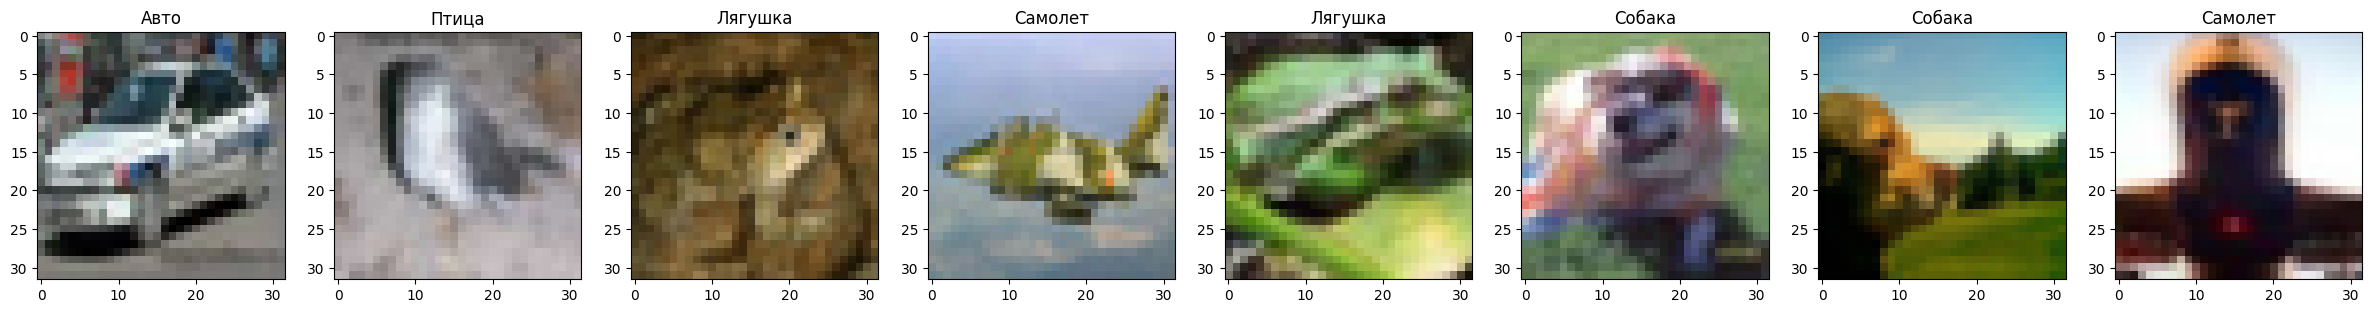

In [ ]:
show(imgs, labels)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
class ToVect(nn.Module):
  def forward(self, img):
    return img.view(img.size(0), -1)

Рассмотрим несколько вариантов упрощенной архитектуры перед тем, как усложнить и доучить ее

In [ ]:
ks = 3
cc = 2

class CNN(nn.Module): #один пулинг
    def __init__(self, num_classes=10):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 20, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(20),
            nn.ReLU())
        self.layer2 = nn.Sequential(
            nn.Conv2d(20, 20, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(20),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer3 = nn.Sequential(
            nn.Conv2d(20, 40, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(40),
            nn.ReLU())
        self.layer4 = nn.Sequential(
            nn.Conv2d(40, 40, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(40),
            nn.ReLU(),
            # nn.MaxPool2d(kernel_size = 2, stride = 2)
            )
        self.layer5 = nn.Sequential(
            nn.Conv2d(40, 40, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(40),
            nn.ReLU())
        self.layer6 = nn.Sequential(
            nn.Conv2d(40, 40, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(40),
            nn.ReLU())
        self.layer7 = nn.Sequential(
            nn.Sequential(
            nn.Conv2d(40, 40, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(40),
            nn.ReLU()),

            nn.Sequential(
            nn.Conv2d(40, 40, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(40),
            nn.ReLU()),

            # nn.Sequential(
            # nn.Conv2d(40, 40, kernel_size=3, stride=1, padding=1),
            # nn.BatchNorm2d(40),
            # nn.ReLU())
        )
        self.tovect = ToVect()
        self.fc = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(10240, 1000),
            nn.ReLU())
        self.fc1 = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(1000, 100),
            nn.ReLU())
        self.fc2= nn.Sequential(
            nn.Linear(100, num_classes))

    def forward(self, x):
        out = self.layer1(x).to(device)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.layer5(out)
        out = self.layer6(out)
        out = self.layer7(out)
        out = self.tovect(out)
        out = self.fc(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

In [ ]:
ks = 3
cc = 2

class CNN2(nn.Module): #два пулинга
    def __init__(self, num_classes=10):
        super(CNN2, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 20, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(20),
            nn.ReLU())
        self.layer2 = nn.Sequential(
            nn.Conv2d(20, 20, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(20),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer3 = nn.Sequential(
            nn.Conv2d(20, 40, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(40),
            nn.ReLU())
        self.layer4 = nn.Sequential(
            nn.Conv2d(40, 40, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(40),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2)
            )
        self.layer5 = nn.Sequential(
            nn.Conv2d(40, 40, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(40),
            nn.ReLU())
        self.layer6 = nn.Sequential(
            nn.Conv2d(40, 40, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(40),
            nn.ReLU())
        self.layer7 = nn.Sequential(
            nn.Sequential(
            nn.Conv2d(40, 40, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(40),
            nn.ReLU()),

            nn.Sequential(
            nn.Conv2d(40, 40, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(40),
            nn.ReLU()),

            # nn.Sequential(
            # nn.Conv2d(40, 40, kernel_size=3, stride=1, padding=1),
            # nn.BatchNorm2d(40),
            # nn.ReLU())
        )
        self.tovect = ToVect()
        self.fc = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(2560, 1000),
            nn.ReLU())
        self.fc1 = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(1000, 100),
            nn.ReLU())
        self.fc2= nn.Sequential(
            nn.Linear(100, num_classes))

    def forward(self, x):
        out = self.layer1(x).to(device)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.layer5(out)
        out = self.layer6(out)
        out = self.layer7(out)
        out = self.tovect(out)
        out = self.fc(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

In [ ]:
ks = 3
cc = 2

class CNN3(nn.Module):#три пулинга
    def __init__(self, num_classes=10):
        super(CNN3, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 20, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(20),
            nn.ReLU())
        self.layer2 = nn.Sequential(
            nn.Conv2d(20, 20, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(20),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer3 = nn.Sequential(
            nn.Conv2d(20, 40, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(40),
            nn.ReLU())
        self.layer4 = nn.Sequential(
            nn.Conv2d(40, 40, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(40),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2)
            )
        self.layer5 = nn.Sequential(
            nn.Conv2d(40, 80, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(80),
            nn.ReLU())
        self.layer6 = nn.Sequential(
            nn.Conv2d(80, 80, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(80),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer7 = nn.Sequential(
            nn.Sequential(
            nn.Conv2d(80, 80, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(80),
            nn.ReLU()),

            nn.Sequential(
            nn.Conv2d(80, 80, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(80),
            nn.ReLU()),

            # nn.Sequential(
            # nn.Conv2d(40, 40, kernel_size=3, stride=1, padding=1),
            # nn.BatchNorm2d(40),
            # nn.ReLU())
        )
        self.tovect = ToVect()
        self.fc = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(1280, 1000),
            nn.ReLU())
        self.fc1 = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(1000, 100),
            nn.ReLU())
        self.fc2= nn.Sequential(
            nn.Linear(100, num_classes))

    def forward(self, x):
        out = self.layer1(x).to(device)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.layer5(out)
        out = self.layer6(out)
        out = self.layer7(out)
        out = self.tovect(out)
        out = self.fc(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

In [ ]:
ks = 3
cc = 2

class CNN4(nn.Module):#четыре пулинга
    def __init__(self, num_classes=10):
        super(CNN4, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 20, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(20),
            nn.ReLU())
        self.layer2 = nn.Sequential(
            nn.Conv2d(20, 20, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(20),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer3 = nn.Sequential(
            nn.Conv2d(20, 40, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(40),
            nn.ReLU())
        self.layer4 = nn.Sequential(
            nn.Conv2d(40, 40, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(40),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2)
            )
        self.layer5 = nn.Sequential(
            nn.Conv2d(40, 80, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(80),
            nn.ReLU())
        self.layer6 = nn.Sequential(
            nn.Conv2d(80, 80, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(80),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer7 = nn.Sequential(
            nn.Sequential(
            nn.Conv2d(80, 160, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(160),
            nn.ReLU()),

            nn.Sequential(
            nn.Conv2d(160, 160, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(160),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2)),

            nn.Sequential(
            nn.Conv2d(160, 160, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(160),
            nn.ReLU()),

            nn.Sequential(
            nn.Conv2d(160, 160, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(160),
            nn.ReLU())
        )
        self.tovect = ToVect()
        self.fc = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(640, 500),
            nn.ReLU())
        self.fc1 = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(500, 100),
            nn.ReLU())
        self.fc2= nn.Sequential(
            nn.Linear(100, num_classes))

    def forward(self, x):
        out = self.layer1(x).to(device)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.layer5(out)
        out = self.layer6(out)
        out = self.layer7(out)
        out = self.tovect(out)
        out = self.fc(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

In [ ]:
ks = 3
cc = 2

class CNN5(nn.Module):#пять пулингов
    def __init__(self, num_classes=10):
        super(CNN5, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 20, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(20),
            nn.ReLU())
        self.layer2 = nn.Sequential(
            nn.Conv2d(20, 20, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(20),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer3 = nn.Sequential(
            nn.Conv2d(20, 40, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(40),
            nn.ReLU())
        self.layer4 = nn.Sequential(
            nn.Conv2d(40, 40, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(40),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2)
            )
        self.layer5 = nn.Sequential(
            nn.Conv2d(40, 80, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(80),
            nn.ReLU())
        self.layer6 = nn.Sequential(
            nn.Conv2d(80, 80, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(80),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer7 = nn.Sequential(
            nn.Sequential(
            nn.Conv2d(80, 160, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(160),
            nn.ReLU()),

            nn.Sequential(
            nn.Conv2d(160, 160, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(160),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2)),

            nn.Sequential(
            nn.Conv2d(160, 320, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(320),
            nn.ReLU()),

            nn.Sequential(
            nn.Conv2d(320, 320, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(320),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2)),

            nn.Sequential(
            nn.Conv2d(320, 320, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(320),
            nn.ReLU()),

            nn.Sequential(
            nn.Conv2d(320, 320, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(320),
            nn.ReLU()),

            nn.Sequential(
            nn.Conv2d(320, 320, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(320),
            nn.ReLU()),
            # nn.Sequential(
            # nn.Conv2d(320, 320, kernel_size=3, stride=1, padding=1),
            # nn.BatchNorm2d(320),
            # nn.ReLU())
        )
        self.tovect = ToVect()
        self.fc = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(320, 300),
            nn.ReLU())
        self.fc1 = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(300, 300),
            nn.ReLU())
        self.fc2= nn.Sequential(
            nn.Linear(300, num_classes))

    def forward(self, x):
        out = self.layer1(x).to(device)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.layer5(out)
        out = self.layer6(out)
        out = self.layer7(out)
        out = self.tovect(out)
        out = self.fc(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

In [ ]:
def train(model, n_e = 15, l_r = 0.005):
  num_classes = 10
  num_epochs = n_e
  batch_size = 8
  learning_rate = l_r

  # Loss and optimizer
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay = 0.005, momentum = 0.9)


  # Train the model
  total_step = len(train_loader)

  total_step = len(train_loader)

  for epoch in range(num_epochs):
      for i, (images, labels) in enumerate(train_loader):
          # Move tensors to the configured device
          images = images.to(device)
          labels = labels.to(device)

          # Forward pass
          outputs = model(images)
          loss = criterion(outputs, labels)

          # Backward and optimize
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()

      print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                    .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

      # Validation
      with torch.no_grad():
          correct = 0
          total = 0
          for images, labels in valid_loader:
              images = images.to(device)
              labels = labels.to(device)
              outputs = model(images)
              _, predicted = torch.max(outputs.data, 1)
              total += labels.size(0)
              correct += (predicted == labels).sum().item()
              del images, labels, outputs
          print(total, correct)
          print('Accuracy of the network on the {} validation images: {} %'.format(total, 100 * correct / total))

In [ ]:
def check(model):
  with torch.no_grad():
      correct = 0
      total = 0
      for images, labels in test_loader:
          images = images.to(device)
          labels = labels.to(device)
          outputs = model(images)
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()
          del images, labels, outputs

      print('Accuracy of the network on the {} test images: {} %'.format(total, 100 * correct / total))

In [ ]:
model1 = CNN().to(device)
model2 = CNN2().to(device)
model3 = CNN3().to(device)
model4 = CNN4().to(device)
model5 = CNN5().to(device)

In [ ]:
train(model1)

Epoch [1/15], Step [5625/5625], Loss: 1.1186
5000 2291
Accuracy of the network on the 5000 validation images: 45.82 %
Epoch [2/15], Step [5625/5625], Loss: 0.6193
5000 2828
Accuracy of the network on the 5000 validation images: 56.56 %
Epoch [3/15], Step [5625/5625], Loss: 1.6375
5000 2956
Accuracy of the network on the 5000 validation images: 59.12 %
Epoch [4/15], Step [5625/5625], Loss: 2.0241
5000 2834
Accuracy of the network on the 5000 validation images: 56.68 %
Epoch [5/15], Step [5625/5625], Loss: 1.1876
5000 2860
Accuracy of the network on the 5000 validation images: 57.2 %
Epoch [6/15], Step [5625/5625], Loss: 0.8553
5000 3099
Accuracy of the network on the 5000 validation images: 61.98 %
Epoch [7/15], Step [5625/5625], Loss: 1.1991
5000 2886
Accuracy of the network on the 5000 validation images: 57.72 %
Epoch [8/15], Step [5625/5625], Loss: 1.9419
5000 2753
Accuracy of the network on the 5000 validation images: 55.06 %
Epoch [9/15], Step [5625/5625], Loss: 1.1317
5000 3039
Ac

In [ ]:
check(model1)

Accuracy of the network on the 10000 test images: 61.63 %


In [ ]:
train(model2)

Epoch [1/15], Step [5625/5625], Loss: 0.7822
5000 2619
Accuracy of the network on the 5000 validation images: 52.38 %
Epoch [2/15], Step [5625/5625], Loss: 1.5963
5000 2730
Accuracy of the network on the 5000 validation images: 54.6 %
Epoch [3/15], Step [5625/5625], Loss: 1.2102
5000 2961
Accuracy of the network on the 5000 validation images: 59.22 %
Epoch [4/15], Step [5625/5625], Loss: 0.9981
5000 3046
Accuracy of the network on the 5000 validation images: 60.92 %
Epoch [5/15], Step [5625/5625], Loss: 1.2366
5000 2978
Accuracy of the network on the 5000 validation images: 59.56 %
Epoch [6/15], Step [5625/5625], Loss: 1.6261
5000 3059
Accuracy of the network on the 5000 validation images: 61.18 %
Epoch [7/15], Step [5625/5625], Loss: 1.2426
5000 3053
Accuracy of the network on the 5000 validation images: 61.06 %
Epoch [8/15], Step [5625/5625], Loss: 0.9074
5000 2988
Accuracy of the network on the 5000 validation images: 59.76 %
Epoch [9/15], Step [5625/5625], Loss: 1.3906
5000 3119
Ac

In [ ]:
check(model2)

Accuracy of the network on the 10000 test images: 61.69 %


In [ ]:
train(model3)

Epoch [1/15], Step [5625/5625], Loss: 1.1721
5000 2580
Accuracy of the network on the 5000 validation images: 51.6 %
Epoch [2/15], Step [5625/5625], Loss: 1.4243
5000 2956
Accuracy of the network on the 5000 validation images: 59.12 %
Epoch [3/15], Step [5625/5625], Loss: 1.0520
5000 3059
Accuracy of the network on the 5000 validation images: 61.18 %
Epoch [4/15], Step [5625/5625], Loss: 1.9962
5000 3127
Accuracy of the network on the 5000 validation images: 62.54 %
Epoch [5/15], Step [5625/5625], Loss: 0.8656
5000 3127
Accuracy of the network on the 5000 validation images: 62.54 %
Epoch [6/15], Step [5625/5625], Loss: 1.7700
5000 3323
Accuracy of the network on the 5000 validation images: 66.46 %
Epoch [7/15], Step [5625/5625], Loss: 0.5162
5000 3229
Accuracy of the network on the 5000 validation images: 64.58 %
Epoch [8/15], Step [5625/5625], Loss: 1.7917
5000 3129
Accuracy of the network on the 5000 validation images: 62.58 %
Epoch [9/15], Step [5625/5625], Loss: 1.2613
5000 3267
Ac

In [ ]:
check(model3)

Accuracy of the network on the 10000 test images: 63.24 %


In [ ]:
train(model4)

Epoch [1/15], Step [5625/5625], Loss: 1.5887
5000 2126
Accuracy of the network on the 5000 validation images: 42.52 %
Epoch [2/15], Step [5625/5625], Loss: 1.4262
5000 2661
Accuracy of the network on the 5000 validation images: 53.22 %
Epoch [3/15], Step [5625/5625], Loss: 1.0450
5000 2769
Accuracy of the network on the 5000 validation images: 55.38 %
Epoch [4/15], Step [5625/5625], Loss: 0.7150
5000 2907
Accuracy of the network on the 5000 validation images: 58.14 %
Epoch [5/15], Step [5625/5625], Loss: 1.4204
5000 3007
Accuracy of the network on the 5000 validation images: 60.14 %
Epoch [6/15], Step [5625/5625], Loss: 1.1766
5000 3073
Accuracy of the network on the 5000 validation images: 61.46 %
Epoch [7/15], Step [5625/5625], Loss: 1.9359
5000 3154
Accuracy of the network on the 5000 validation images: 63.08 %
Epoch [8/15], Step [5625/5625], Loss: 0.7544
5000 3201
Accuracy of the network on the 5000 validation images: 64.02 %
Epoch [9/15], Step [5625/5625], Loss: 1.3922
5000 3116
A

In [ ]:
check(model4)

Accuracy of the network on the 10000 test images: 62.14 %


In [ ]:
train(model5)

Epoch [1/15], Step [5625/5625], Loss: 1.8979
5000 1128
Accuracy of the network on the 5000 validation images: 22.56 %
Epoch [2/15], Step [5625/5625], Loss: 1.5945
5000 1396
Accuracy of the network on the 5000 validation images: 27.92 %
Epoch [3/15], Step [5625/5625], Loss: 1.5728
5000 1581
Accuracy of the network on the 5000 validation images: 31.62 %
Epoch [4/15], Step [5625/5625], Loss: 1.5812
5000 1622
Accuracy of the network on the 5000 validation images: 32.44 %
Epoch [5/15], Step [5625/5625], Loss: 2.1753
5000 2006
Accuracy of the network on the 5000 validation images: 40.12 %
Epoch [6/15], Step [5625/5625], Loss: 1.8327
5000 1954
Accuracy of the network on the 5000 validation images: 39.08 %
Epoch [7/15], Step [5625/5625], Loss: 1.8741
5000 2145
Accuracy of the network on the 5000 validation images: 42.9 %
Epoch [8/15], Step [5625/5625], Loss: 1.1915
5000 2407
Accuracy of the network on the 5000 validation images: 48.14 %
Epoch [9/15], Step [5625/5625], Loss: 1.1353
5000 2378
Ac

In [ ]:
check(model5)

Accuracy of the network on the 10000 test images: 51.47 %


Так как лучше всего себя показал 3-й вариант, улучшим именно его, увеличив количество слоев изображения после свертки

In [ ]:
class TheBestOneIHope(nn.Module):
    def __init__(self, num_classes=10):
        super(TheBestOneIHope, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 32 * 2, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(32 * 2),
            nn.ReLU())
        self.layer2 = nn.Sequential(
            nn.Conv2d(32 * 2, 32 * 2, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(32 * 2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer3 = nn.Sequential(
            nn.Conv2d(32 * 2, 64 * 2, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64 * 2),
            nn.ReLU())
        self.layer4 = nn.Sequential(
            nn.Conv2d(64 * 2, 64 * 2, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64 * 2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2)
            )
        self.layer5 = nn.Sequential(
            nn.Conv2d(64 * 2, 128 * 2, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128 * 2),
            nn.ReLU())
        self.layer6 = nn.Sequential(
            nn.Conv2d(128 * 2, 128 * 2, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128 * 2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer7 = nn.Sequential(
            nn.Sequential(
            nn.Conv2d(128 * 2, 128 * 2, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128 * 2),
            nn.ReLU()),

            nn.Sequential(
            nn.Conv2d(128 * 2, 128 * 2, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128 * 2),
            nn.ReLU()),

        )
        self.tovect = ToVect()
        self.fc = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(4*4*128 * 2, 1000),
            nn.ReLU())
        self.fc1 = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(1000, 100),
            nn.ReLU())
        self.fc2= nn.Sequential(
            nn.Linear(100, num_classes))

    def forward(self, x):
        # out = self.layer0(x).to(device)
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.layer5(out)
        out = self.layer6(out)
        out = self.layer7(out)
        out = self.tovect(out)
        out = self.fc(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

best_model = TheBestOneIHope().to(device)

In [ ]:
train(best_model, 15, 0.01)
train(best_model, 15)
train(best_model, 15, 0.001)
train(best_model, 15, 0.0005)
train(best_model, 15, 0.00005)

Epoch [1/15], Step [5625/5625], Loss: 1.4659
5000 1894
Accuracy of the network on the 5000 validation images: 37.88 %
Epoch [2/15], Step [5625/5625], Loss: 0.8830
5000 2588
Accuracy of the network on the 5000 validation images: 51.76 %
Epoch [3/15], Step [5625/5625], Loss: 1.3008
5000 2684
Accuracy of the network on the 5000 validation images: 53.68 %
Epoch [4/15], Step [5625/5625], Loss: 1.3409
5000 2547
Accuracy of the network on the 5000 validation images: 50.94 %
Epoch [5/15], Step [5625/5625], Loss: 1.2194
5000 2840
Accuracy of the network on the 5000 validation images: 56.8 %
Epoch [6/15], Step [5625/5625], Loss: 2.2272
5000 2863
Accuracy of the network on the 5000 validation images: 57.26 %
Epoch [7/15], Step [5625/5625], Loss: 0.6279
5000 2719
Accuracy of the network on the 5000 validation images: 54.38 %
Epoch [8/15], Step [5625/5625], Loss: 0.5883
5000 2776
Accuracy of the network on the 5000 validation images: 55.52 %
Epoch [9/15], Step [5625/5625], Loss: 1.5573
5000 2950
Ac

In [ ]:
check(best_model)

Accuracy of the network on the 10000 test images: 85.91 %


In [34]:
train(best_model, 5, 0.000005)

Epoch [1/5], Step [5625/5625], Loss: 0.0060
5000 4304
Accuracy of the network on the 5000 validation images: 86.08 %
Epoch [2/5], Step [5625/5625], Loss: 0.0048
5000 4309
Accuracy of the network on the 5000 validation images: 86.18 %
Epoch [3/5], Step [5625/5625], Loss: 0.0197
5000 4295
Accuracy of the network on the 5000 validation images: 85.9 %
Epoch [4/5], Step [5625/5625], Loss: 0.0076
5000 4283
Accuracy of the network on the 5000 validation images: 85.66 %
Epoch [5/5], Step [5625/5625], Loss: 0.0114
5000 4308
Accuracy of the network on the 5000 validation images: 86.16 %


In [35]:
train(best_model, 5, 0.0000005)

Epoch [1/5], Step [5625/5625], Loss: 0.0158
5000 4321
Accuracy of the network on the 5000 validation images: 86.42 %
Epoch [2/5], Step [5625/5625], Loss: 0.0115
5000 4283
Accuracy of the network on the 5000 validation images: 85.66 %
Epoch [3/5], Step [5625/5625], Loss: 0.0097
5000 4284
Accuracy of the network on the 5000 validation images: 85.68 %
Epoch [4/5], Step [5625/5625], Loss: 0.0065
5000 4289
Accuracy of the network on the 5000 validation images: 85.78 %
Epoch [5/5], Step [5625/5625], Loss: 0.0103
5000 4305
Accuracy of the network on the 5000 validation images: 86.1 %


In [37]:
train(best_model, 5, 0.000000001)

Epoch [1/5], Step [5625/5625], Loss: 0.0095
5000 4307
Accuracy of the network on the 5000 validation images: 86.14 %
Epoch [2/5], Step [5625/5625], Loss: 0.0161
5000 4291
Accuracy of the network on the 5000 validation images: 85.82 %
Epoch [3/5], Step [5625/5625], Loss: 0.0117
5000 4314
Accuracy of the network on the 5000 validation images: 86.28 %
Epoch [4/5], Step [5625/5625], Loss: 0.0088
5000 4285
Accuracy of the network on the 5000 validation images: 85.7 %
Epoch [5/5], Step [5625/5625], Loss: 0.0006
5000 4292
Accuracy of the network on the 5000 validation images: 85.84 %


In [38]:
check(best_model)

Accuracy of the network on the 10000 test images: 86.02 %


Эх, уперлись в потолок(( Дальше надо менять слои